# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [100]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\susan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [101]:
# Read your api key environment variable
#load_dotenv('api.env')
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [102]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [103]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
#bitcoin_news

In [104]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
#ethereum_news

In [105]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,,0.0000,0.000,0.000,0.000
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754


In [106]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,compound,positive,negative,neutral
0,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916


In [107]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.116606,0.047167,0.019278,0.878056
std,0.375023,0.068267,0.045114,0.230790
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.865250
50%,0.000000,0.000000,0.000000,0.926500
75%,0.415300,0.075250,0.000000,1.000000
max,0.831600,0.246000,0.142000,1.000000


In [108]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.186860,0.067900,0.028350,0.903750
std,0.370757,0.048923,0.048258,0.062447
min,-0.557400,0.000000,0.000000,0.789000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.296000,0.073500,0.000000,0.912500
75%,0.475725,0.096250,0.051500,0.938250
max,0.709600,0.144000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [109]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [110]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("!")
stop.append("'s'")
stop.append("...")

print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [111]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [112]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwide, Photo, ..."
1,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, Twitter, hac..."
2,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, Coinb..."
3,,0.0000,0.000,0.000,0.000,[]
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[TL, DR, Enter, Complete, Bitcoin, BTC, Invest..."


In [113]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[Famed, auction, house, Christies, sold, first..."
1,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwide, Photo, ..."
2,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[Worried, GeForce, RTX, 3060, sold, cryptocurr..."
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"['s, everything, need, know, non-fungible, tok..."
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[OpenSea, one, handful, NFT, marketplace, expl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [114]:
from collections import Counter
from nltk import ngrams

In [115]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df["text"].str.cat()),N)
Counter(grams).most_common(10)

[(('char', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('Staff', 'FILE'), 4),
 (('FILE', 'PHOTO'), 4),
 (('virtual', 'currency'), 4),
 (('illustration', 'taken'), 4),
 (('currency', 'Bitcoin'), 3),
 (('taken', 'January'), 3),
 (('last', 'year'), 2),
 (('cryptocurrency', 'exchange'), 2)]

In [116]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df["text"].str.cat()),N)
Counter(grams).most_common(10)

[(('non-fungible', 'token'), 4),
 (('char', 'NFTs'), 3),
 (('record', 'high'), 3),
 (('RTX', '3060'), 2),
 (('cryptocurrency', 'miner'), 2),
 (('latest', 'cryptocurrency'), 2),
 (('token', '—'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('char', 'NEW'), 2),
 (('NEW', 'YORK'), 2)]

In [117]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [118]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(bitcoin_df["text"].str.cat())
token_count(all_tokens,10)

[('char', 17),
 ('Reuters', 12),
 ('Bitcoin', 9),
 ('Staff', 6),
 ('cryptocurrency', 4),
 ('2021', 4),
 ('FILE', 4),
 ('PHOTO', 4),
 ('virtual', 4),
 ('currency', 4)]

In [119]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(ethereum_df["text"].str.cat())
token_count(all_tokens,10)

[('char', 19),
 ('cryptocurrency', 10),
 ('Reuters', 7),
 ('Ethereum', 7),
 ('week', 6),
 ('digital', 5),
 ('new', 5),
 ('token', 5),
 ('million', 4),
 ('…', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

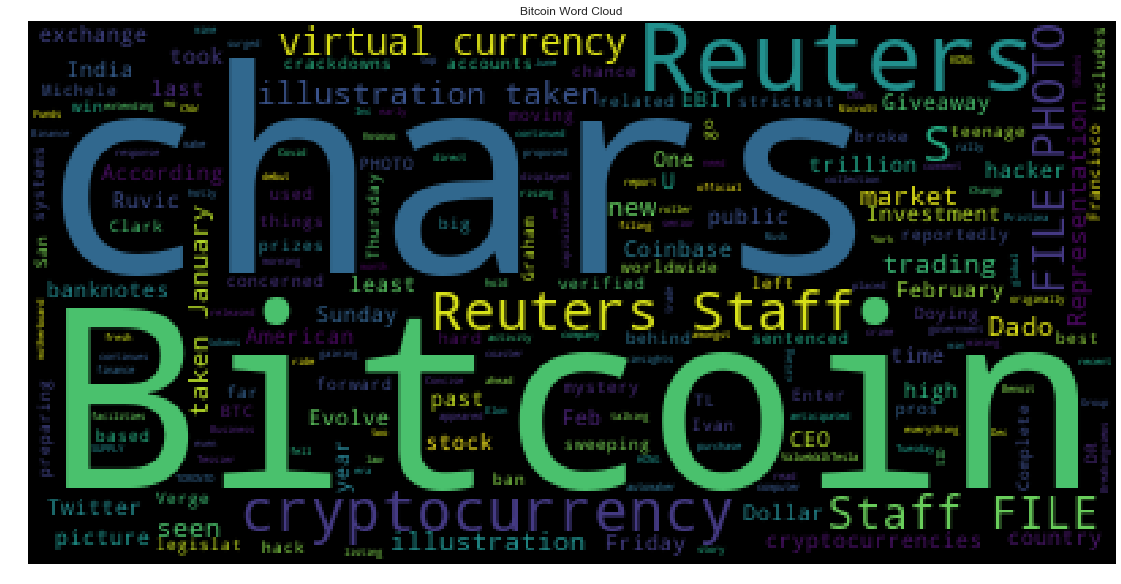

In [121]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_df['text'].str.cat())
plt.imshow(wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud")

Text(0.5, 1.0, 'Ethereum Word Cloud')

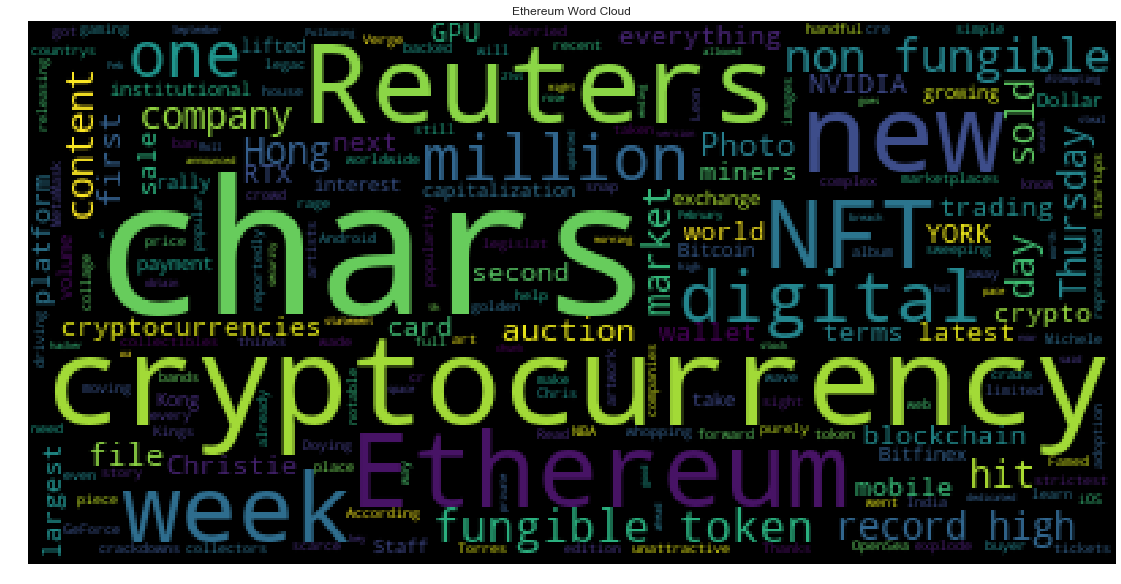

In [122]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_df['text'].str.cat())
plt.imshow(wc)
plt.axis("off")
plt.title("Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [123]:
import spacy
from spacy import displacy

In [78]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [90]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [145]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_df['text'].str.cat()
bitcoin_text

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker who broke\r\n into Twitters systems, took over verified accounts, and used t… [+2552 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]New York (CNN Business)Bitcoin\'s roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $5

In [146]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [147]:
# Render the visualization
displacy.render(doc, style='ent')

In [148]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['One', 'Photo', 'Michele Doying', 'India', 'Reuters', 'last years', 'Twitter', 'Graham Ivan Clark', 'Twitters', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'over $12,000', 'CNN', 'above $58,000', 'Sunday', 'just above $46,000', 'Tuesday', 'India', 'Reuters', 'Coinbase', 'American', '19, 2021', 'Elon Musk', 'Binance', 'Changp', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Bitcoin', 'January 21, 2021', 'Reuters', 'Reuters', 'Feb 21', 'Reuters', 'Sunday', 'two-month', '$1 trillion', 'Friday', 'Reuters', 'Pristina', 'Kosovo', 'June 12, 2018', 'HONG KONG', 'Reuters Breakingviews', 'Feb. 19, 2021', 'Evolve', 'week of February', 'North American', '4', 'Bitcoin', 'past $56,000', 'Friday', '$1 trillion', 'Reuters', 'Bitcoin', 'U.S.', 'January 8, 2021', 'Dado Ru', 'Reuters', 'Bitcoin', 'U.S.', 'January 27, 2020']


---

### Ethereum NER

In [149]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_df['text'].str.cat()
ethereum_text

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startu

In [150]:
# Run the NER processor on all of the text
doc2 = nlp(ethereum_text)

# Add a title to the document
doc2.user_data['title'] = 'Ethereum NER'

In [151]:
# Render the visualization
displacy.render(doc2, style='ent')

In [153]:
# List all Entities
print([ent.text for ent in doc2.ents if ent.label_])

['Christies', 'first', '$69 million', '5,000', 'Photo', 'Michele Doying', 'India', 'Reuters', 'GeForce', '3060', 'GPU', 'here.)OpenSea', 'NFT', 'recent weeks', 'these days', 'Kings', 'NBA', 'millions', 'Ethereum', 'first', "Christie's", 'NFT', 'a few days', 'Chris Torres', 'one', 'Ethereum', 'September 2020', 'about $5.7 million', '3060', 'GPU', 'next week', 'Nvidia', 'this morning', 'chars]NEW YORK', 'Reuters', 'second', 'Thursday', 'chars]NEW YORK', 'Feb 18', 'Reuters', 'second', 'Thursday', '7.34%', 'the week ending 21st February', '11.65%', 'the previous week', 'Ethereum ended', 'the week', '1,935.57', 'the week', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'Bitfinex', 'Bitfinex', 'millions of dollars', 'Reuters', 'SINGAPORE', 'Reuters', 'Asian', 'Saturday', 'two-month', '$1 trillion', 'a day earlier', 'World FX', 'Kevin Buckland', 'Reuters', 'Meitu', 'Hong Kong', 'China', 'March 24, 2017', 'Bobby Yip', 'HONG KONG', 'Reuters', 'Hong Ko']


---